In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import torch
import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, plot_single_system
from data.metrics import maximum_mean_discrepancy, wasserstein_distance
from models.diffusion import *

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
zeo, osda = 'ITG', 'C[N+]1(C)CCC([N+]2(C)CCCC2)CC1'

In [3]:
model_type = 'diff'
fname = 'v3'
split = 'system'

# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs, cond_scale=0.75)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


ITG C[N+]1(C)CCC([N+]2(C)CCCC2)CC1


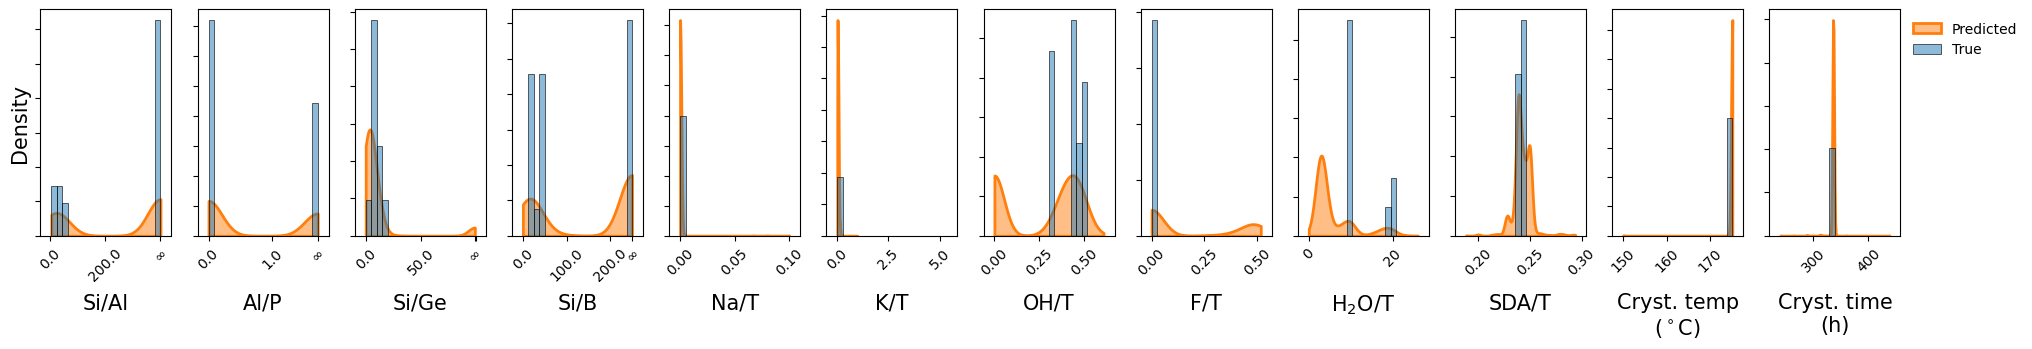

In [4]:
plot_single_system(syn_pred, syn_true, zeo=zeo, osda=osda)

In [5]:
pred, true = syn_pred[(syn_pred['zeo'] == zeo) & (syn_pred['osda'] == osda)], syn_true[(syn_true['zeo'] == zeo) & (syn_true['osda'] == osda)]

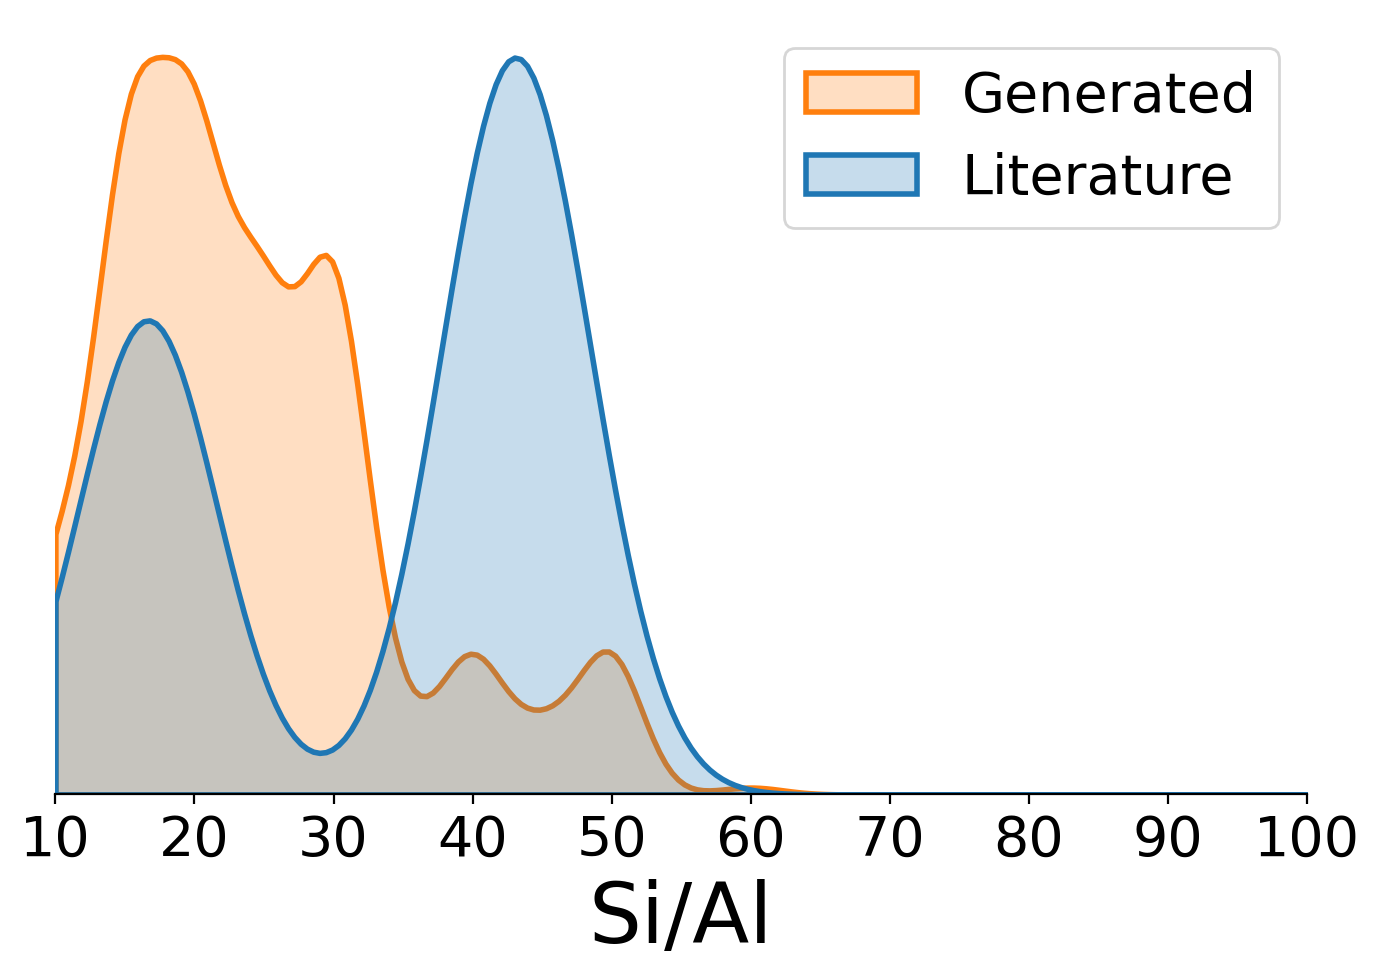

In [6]:
fig = plt.figure(figsize=(7, 5), dpi=200)

# Add subplots
xlim = (10, 100)
sns.kdeplot(pred['Si/Al'], label='Generated', fill=True, bw_adjust=0.05, color='tab:orange', clip=xlim, cut=100, linewidth=2)
# sns.histplot(true['Si/Al'], label='Literature', bins=50, binrange=xlim, stat='density')
sns.kdeplot(true['Si/Al'], label='Literature', fill=True, bw_adjust=0.05, color='tab:blue',  clip=xlim, cut=100, linewidth=2)
plt.legend(loc='upper right', fontsize=20, frameon=True)
plt.xlim(*xlim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Si/Al', fontsize=30)
plt.ylabel('Density', fontsize=30)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

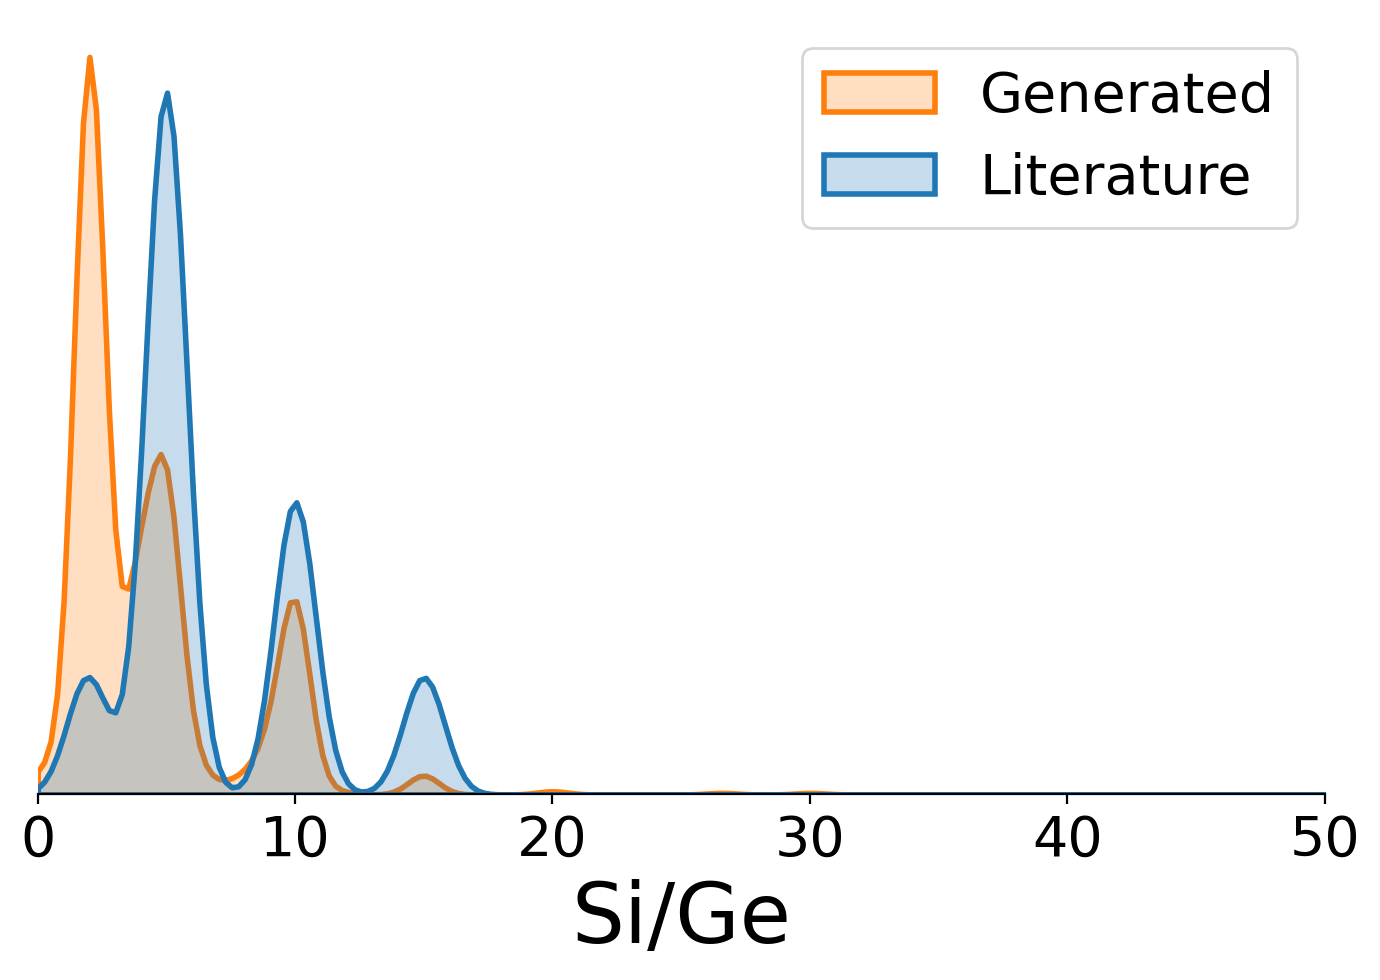

In [7]:
fig = plt.figure(figsize=(7, 5), dpi=200)

# Add subplots
xlim = (0, 50)
sns.kdeplot(pred['Si/Ge'], label='Generated', fill=True, bw_adjust=0.1, color='tab:orange', clip=xlim, cut=100, linewidth=2)
# sns.histplot(true['Si/Al'], label='Literature', bins=50, binrange=xlim, stat='density')
sns.kdeplot(true['Si/Ge'], label='Literature', fill=True, bw_adjust=0.4, color='tab:blue',  clip=xlim, cut=100, linewidth=2)
plt.legend(loc='upper right', fontsize=20, frameon=True)
plt.xlim(*xlim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Si/Ge', fontsize=30)
plt.ylabel('Density', fontsize=30)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

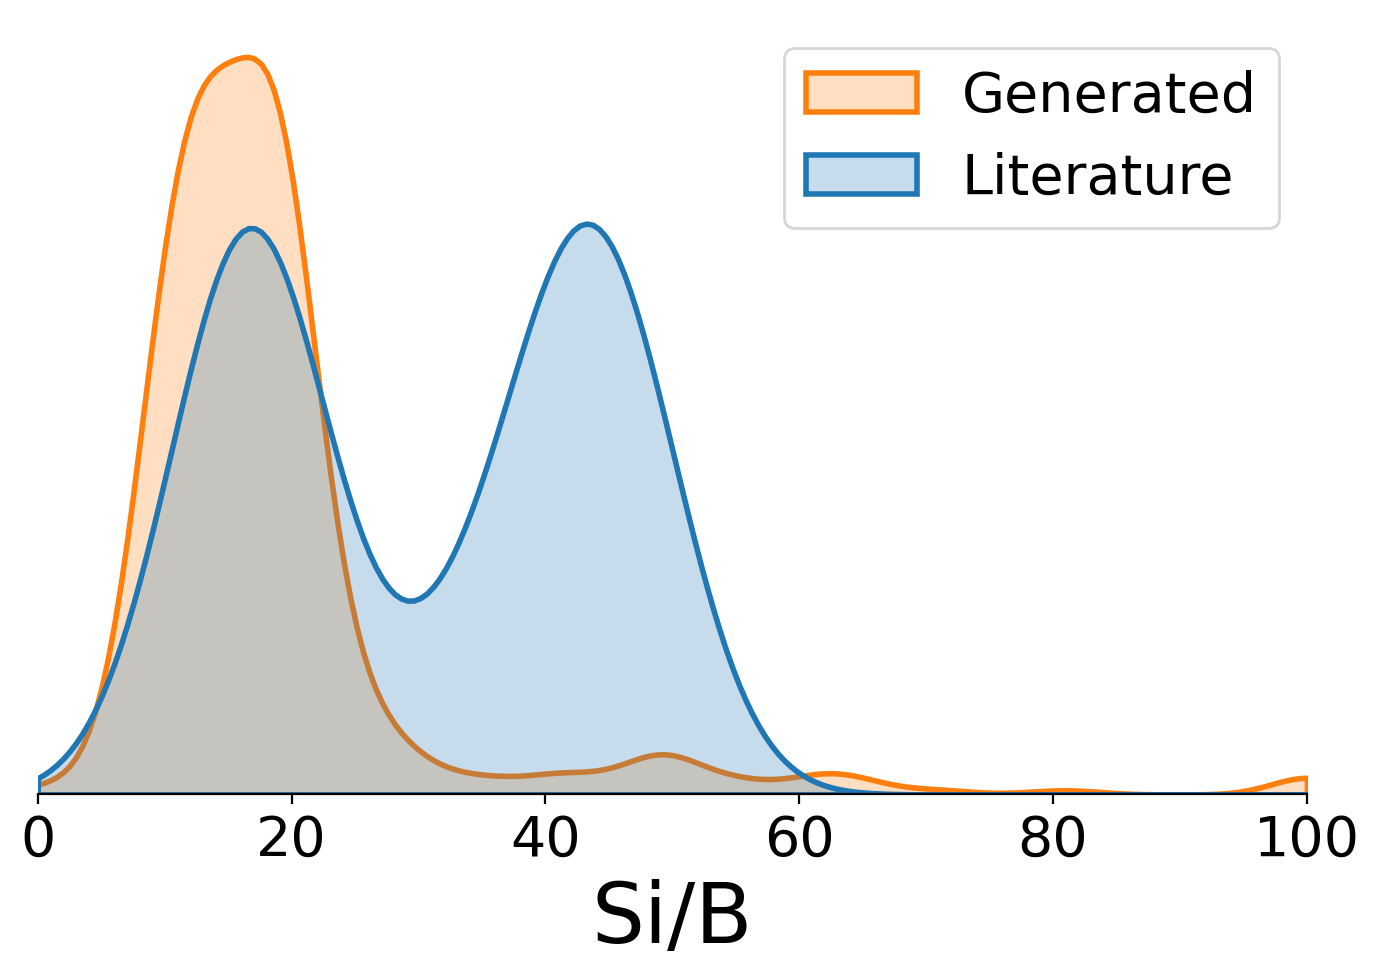

In [8]:
fig = plt.figure(figsize=(7, 5), dpi=200)

# Add subplots
xlim = (0, 100)
sns.kdeplot(pred['Si/B'], label='Generated', fill=True, bw_adjust=0.1, color='tab:orange', clip=xlim, cut=100, linewidth=2)
# sns.histplot(true['Si/Al'], label='Literature', bins=50, binrange=xlim, stat='density')
sns.kdeplot(true['Si/B'], label='Literature', fill=True, bw_adjust=0.1, color='tab:blue',  clip=xlim, cut=100, linewidth=2)
plt.legend(loc='upper right', fontsize=20, frameon=True)
plt.xlim(*xlim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Si/B', fontsize=30)
plt.ylabel('Density', fontsize=30)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

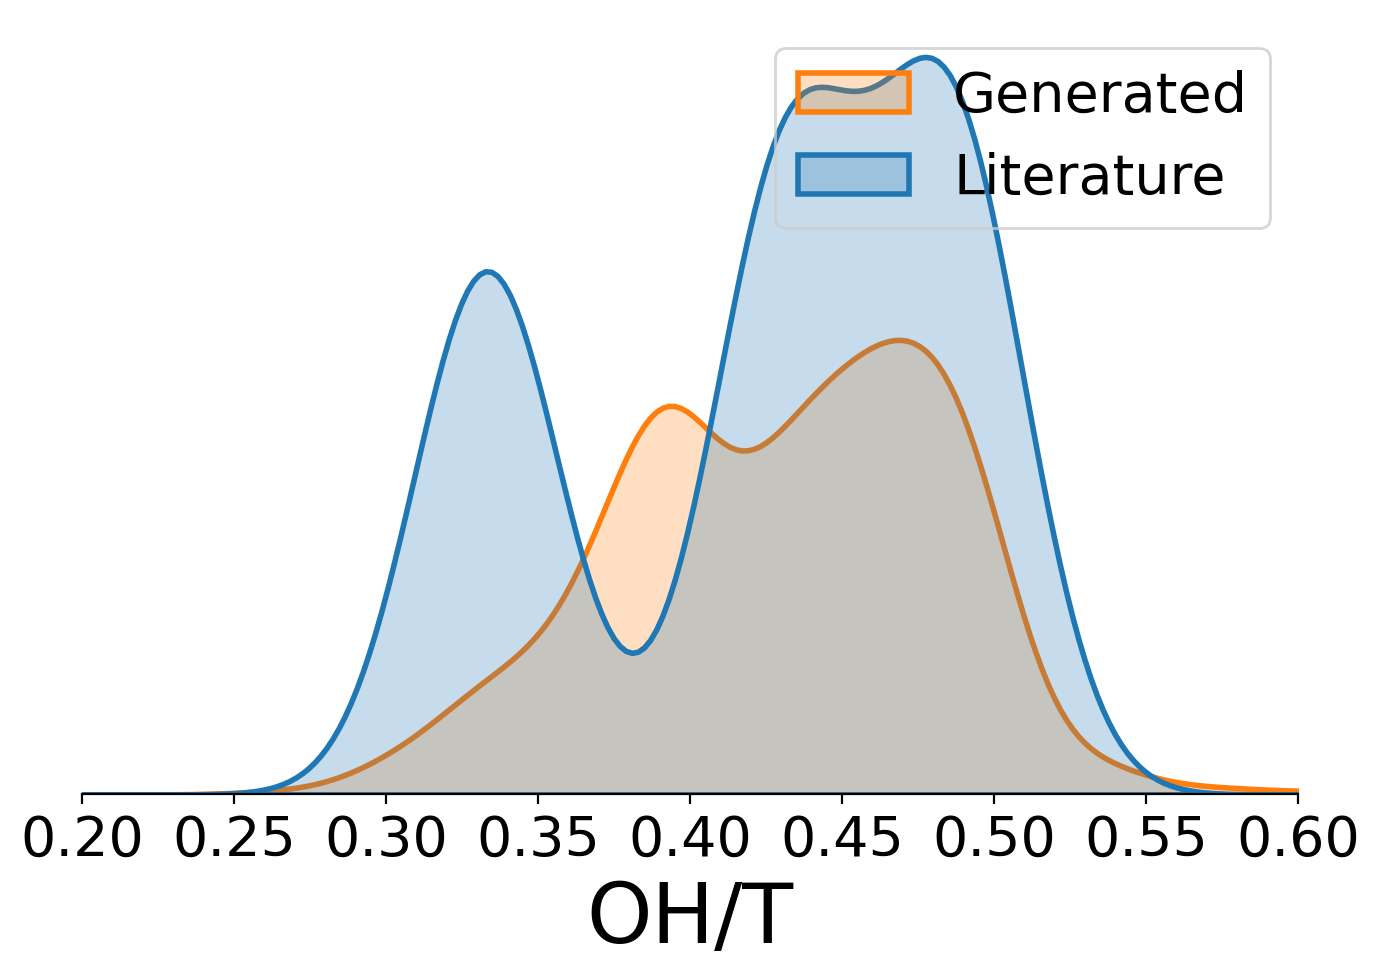

In [9]:
fig = plt.figure(figsize=(7, 5), dpi=200)

# Add subplots
xlim = (0.2, 0.6)
sns.kdeplot(pred['OH/T'], label='Generated', fill=True, bw_adjust=0.3, color='tab:orange', clip=xlim, cut=100, linewidth=2)
# sns.histplot(true['Si/Al'], label='Literature', bins=50, binrange=xlim, stat='density')
sns.kdeplot(true['OH/T'], label='Literature', fill=True, bw_adjust=0.7, color='tab:blue',  clip=xlim, cut=100, linewidth=2)
plt.legend(loc='upper right', fontsize=20, frameon=True)
plt.xlim(*xlim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('OH/T', fontsize=30)
plt.ylabel('Density', fontsize=30)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

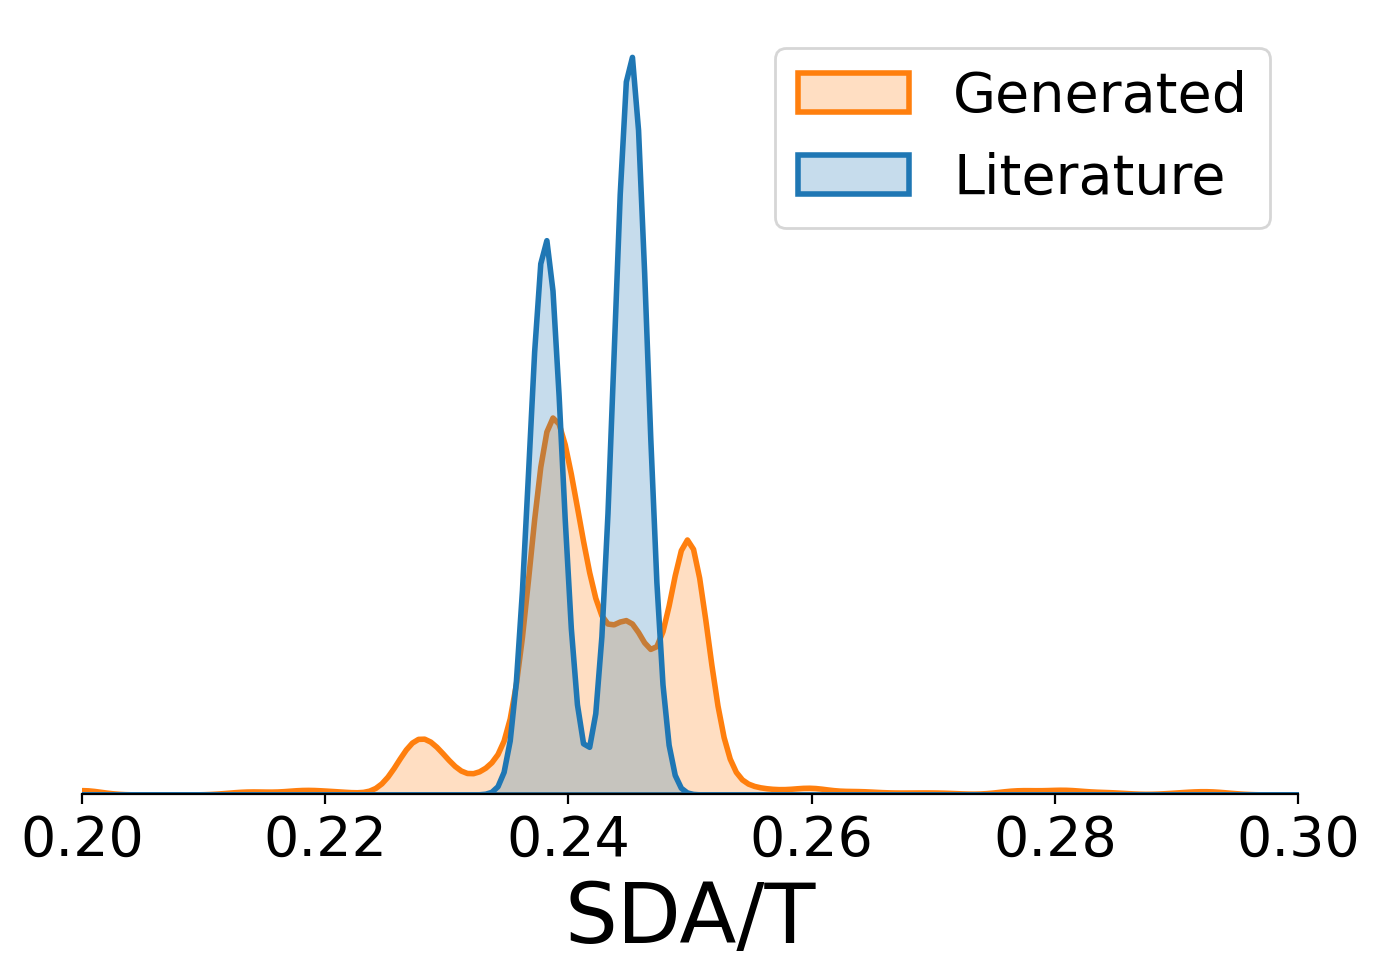

In [10]:
fig = plt.figure(figsize=(7, 5), dpi=200)

# Add subplots
xlim = (0.2, 0.3)
sns.kdeplot(pred['sda1/T'], label='Generated', fill=True, bw_adjust=0.7, color='tab:orange', clip=xlim, cut=100, linewidth=2)
# sns.histplot(true['Si/Al'], label='Literature', bins=50, binrange=xlim, stat='density')
sns.kdeplot(true['sda1/T'], label='Literature', fill=True, bw_adjust=0.7, color='tab:blue',  clip=xlim, cut=100, linewidth=2)
plt.legend(loc='upper right', fontsize=20, frameon=True)
plt.xlim(*xlim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SDA/T', fontsize=30)
plt.ylabel('Density', fontsize=30)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
# Preprocess to unnormalized molar ratios
hets = ['Al', 'Ge', 'B']
thresholds = [0.00251, 0.099990, 0.004001]
for het, thres in zip(hets, thresholds):

    true[f'{het}/Si'] = 1. / true[f'Si/{het}']
    true[f'{het}/Si'] = true[f'{het}/Si'].map(lambda x: 1e-4 if x <= thres else x)
    true[f'{het}'] = true[f'{het}/Si']
    true['Si'] = [1.]*len(true)

    pred[f'{het}/Si'] = 1. / pred[f'Si/{het}']
    pred[f'{het}/Si'] = pred[f'{het}/Si'].map(lambda x: 1e-4 if x <= thres else x)
    pred[f'{het}'] = pred[f'{het}/Si']
    pred['Si'] = [1.]*len(pred)

tot_hets = true[hets].sum(1) # sum of heteroatoms fractions

for c in ['Na', 'K', 'OH', 'F', 'H2O', 'sda1']:
    true[f'{c}'] = true[f'{c}/T'] * tot_hets
    true[f'{c}'] = true[f'{c}'].map(lambda x: 1e-4 if x == 0. else x)
    pred[f'{c}'] = pred[f'{c}/T'] * tot_hets
    pred[f'{c}'] = pred[f'{c}'].map(lambda x: 1e-4 if x == 0. else x)

/tmp/ipykernel_2374863/740923068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true[f'{het}/Si'] = 1. / true[f'Si/{het}']
/tmp/ipykernel_2374863/740923068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true[f'{het}/Si'] = true[f'{het}/Si'].map(lambda x: 1e-4 if x <= thres else x)
/tmp/ipykernel_2374863/740923068.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [12]:
true

,Si/Al,Al/P,Si/Ge,Si/B,Na/T,K/T,OH/T,F/T,H2O/T,sda1/T,...,Ge/Si,Ge,B/Si,B,Na,K,OH,F,H2O,sda1
1454,41.650005,1.717997,4.988024,250.000000,0.0,0.0,0.490196,0.0,9.803922,0.245098,...,0.200480,0.200480,0.000100,0.000100,0.0001,0.0001,0.110093,0.0001,2.201861,0.055047
1455,16.659996,1.717997,4.988024,250.000000,0.0,0.0,0.476190,0.0,9.523809,0.238095,...,0.200480,0.200480,0.000100,0.000100,0.0001,0.0001,0.124097,0.0001,2.481945,0.062049
1456,400.000000,0.000000,1.941176,32.999943,0.0,0.0,0.431373,0.0,9.803922,0.245098,...,0.515152,0.515152,0.030303,0.030303,0.0001,0.0001,0.235337,0.0001,5.348575,0.133714
1457,400.000000,0.000000,4.988024,41.649956,0.0,0.0,0.431373,0.0,9.803922,0.245098,...,0.200480,0.200480,0.024010,0.024010,0.0001,0.0001,0.096882,0.0001,2.201861,0.055047
1458,400.000000,0.000000,1.941176,13.200001,0.0,0.0,0.333333,0.0,9.523809,0.238095,...,0.515152,0.515152,0.075758,0.075758,0.0001,0.0001,0.197003,0.0001,5.628658,0.140716
1459,400.000000,0.000000,4.988024,16.659998,0.0,0.0,0.333333,0.0,9.523809,0.238095,...,0.200480,0.200480,0.060024,0.060024,0.0001,0.0001,0.086868,0.0001,2.481945,0.062049
1460,41.650005,1.717997,4.988024,250.000000,0.0,0.0,0.490196,0.0,9.803922,0.245098,...,0.200480,0.200480,0.000100,0.000100,0.0001,0.0001,0.110093,0.0001,2.201861,0.055047
1461,45.455002,1.717997,10.001101,250.000000,0.0,0.0,0.490196,0.0,9.803922,0.245098,...,0.000100,0.000100,0.000100,0.000100,0.0001,0.0001,0.010882,0.0001,0.217645,0.005441
1462,16.659996,1.717997,4.988024,250.000000,0.0,0.0,0.476190,0.0,9.523809,0.238095,...,0.200480,0.200480,0.000100,0.000100,0.0001,0.0001,0.124097,0.0001,2.481945,0.062049
1463,400.000000,0.000000,4.988024,41.649956,0.0,0.0,0.431373,0.0,9.803922,0.245098,...,0.200480,0.200480,0.024010,0.024010,0.0001,0.0001,0.096882,0.0001,2.201861,0.055047


In [13]:
true[['Ge', 'B', 'Al']]

,Ge,B,Al
1454,0.200480,0.000100,0.024010
1455,0.200480,0.000100,0.060024
1456,0.515152,0.030303,0.000100
1457,0.200480,0.024010,0.000100
1458,0.515152,0.075758,0.000100
1459,0.200480,0.060024,0.000100
1460,0.200480,0.000100,0.024010
1461,0.000100,0.000100,0.022000
1462,0.200480,0.000100,0.060024
1463,0.200480,0.024010,0.000100


/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm


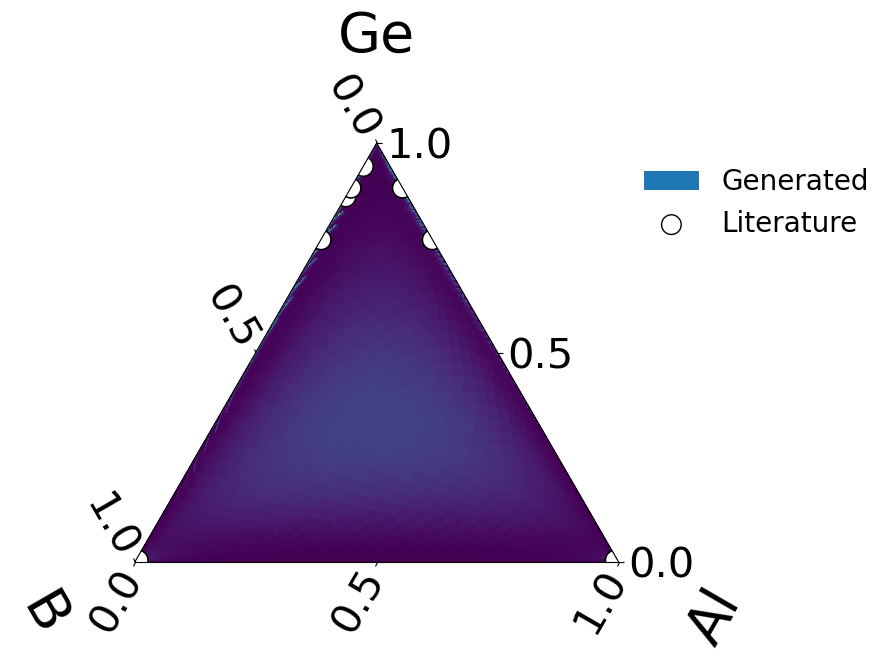

In [14]:
utils.plot_ternary(true, pred, ['Ge', 'B', 'Al'], 
                                        #     ternary_lim=(
                                        #             0.5, 1.0, # right
                                        #             0.0, 0.5, # left
                                        #             0.0, 0.5, # bottom
                                        #     )   
                                    )

/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm
/home/synthesisproject/.local/lib/python3.10/site-packages/pyrolite/comp/codata.py:176: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)  # Log operation


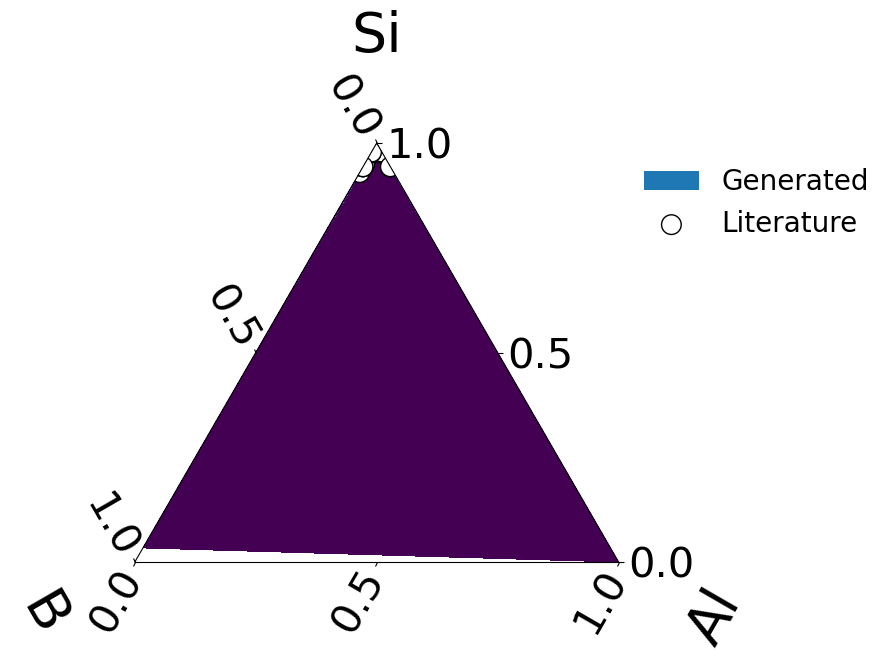

In [15]:
utils.plot_ternary(true, pred, ['Si', 'B', 'Al'], 
                                        #     ternary_lim=(
                                        #             0.85, 1.0, # right
                                        #             0.0, 0.15, # left
                                        #             0.0, 0.15, # bottom
                                        #     )   
                                    )

/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm


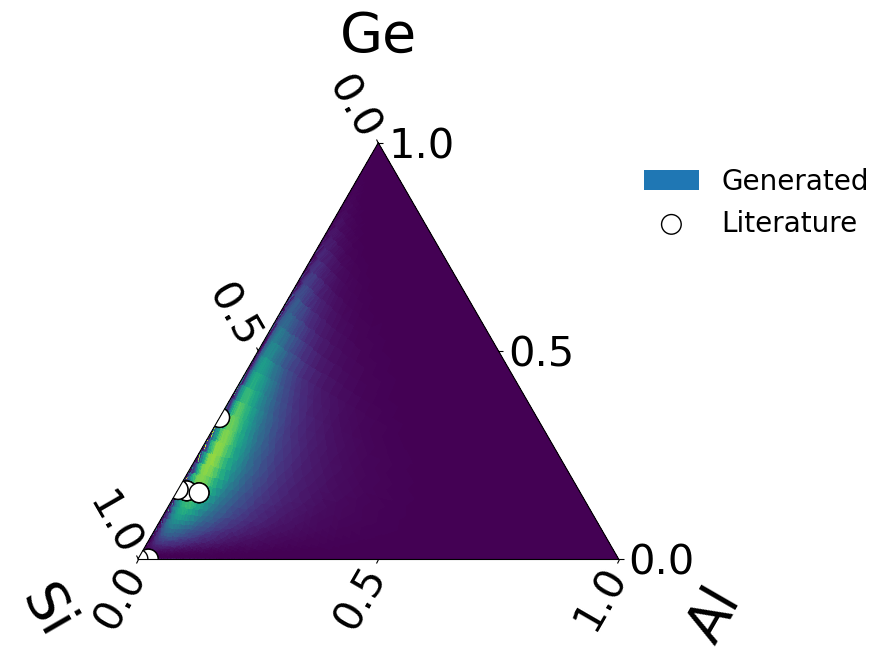

In [16]:
utils.plot_ternary(true, pred, ['Ge', 'Si', 'Al'], 
                                        #     ternary_lim=(
                                        #             0.5, 0.5, # right
                                        #             0.5, 1.0, # left
                                        #             0.0, 0.5, # bottom
                                        #     )   
                                    )

/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm


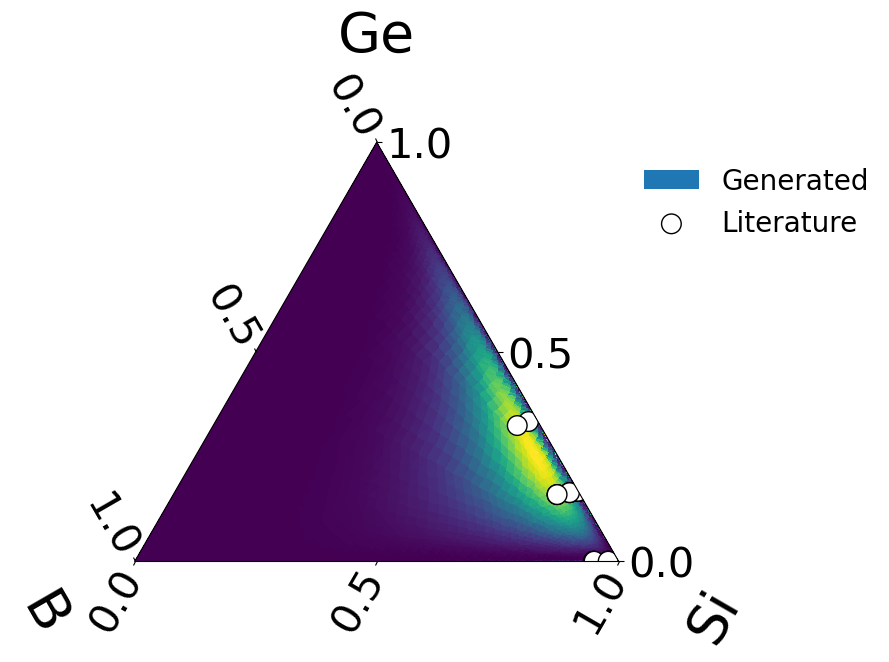

In [17]:
utils.plot_ternary(true, pred, ['Ge', 'B', 'Si'], 
                                        #     ternary_lim=(
                                        #             0.0, 0.8, # right
                                        #             0.0, 0.8, # left
                                        #             0.2, 1.0, # bottom
                                        #     ),
                                    )

/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm
/home/synthesisproject/.local/lib/python3.10/site-packages/pyrolite/comp/codata.py:176: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)  # Log operation


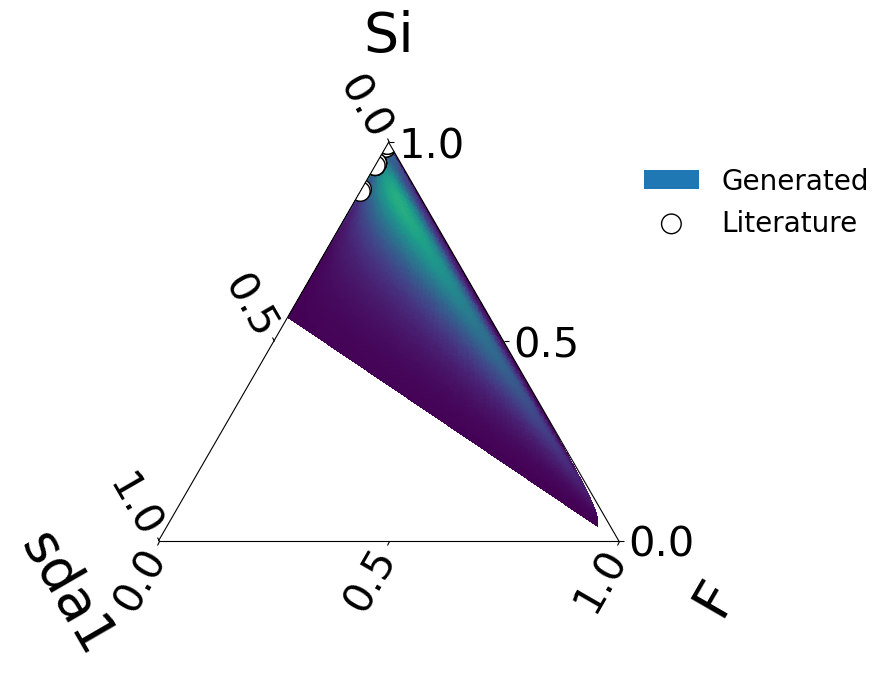

In [18]:
utils.plot_ternary(true, pred, ['Si', 'sda1', 'F'], 
                                        #     ternary_lim=(
                                        #             0.5, 1.0, # right
                                        #             0.0, 0.5, # left
                                        #             0.0, 0.5, # bottom
                                        #     )   
                                    )

/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm


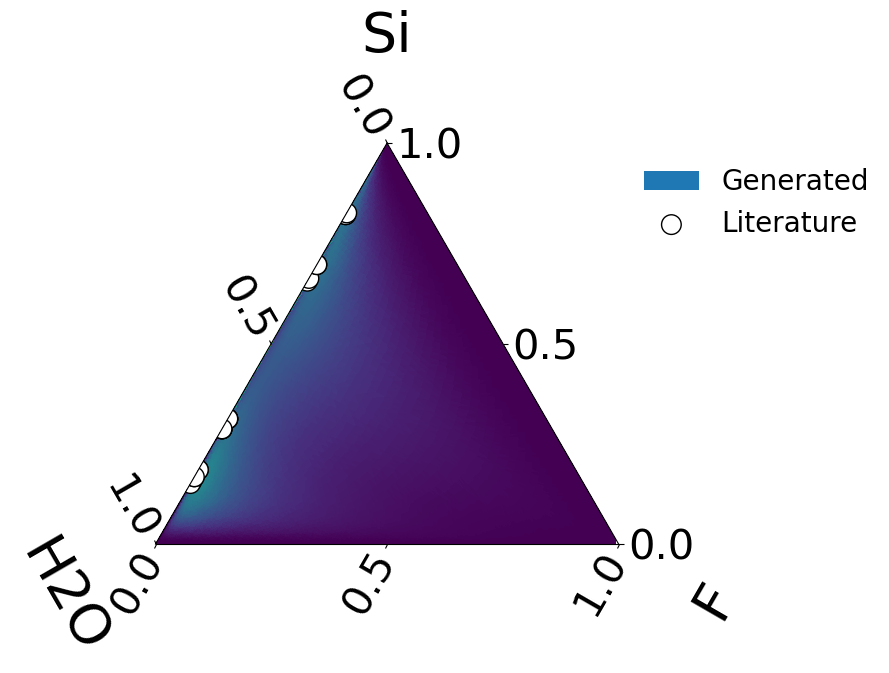

In [19]:
utils.plot_ternary(true, pred, ['Si', 'H2O', 'F'], 
                                        #     ternary_lim=(
                                        #             0.5, 1.0, # right
                                        #             0.0, 0.5, # left
                                        #             0.0, 0.5, # bottom
                                        #     )   
                                        grid_border_frac=2
                                    )

/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:806: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_true[col] = _df_true[col] / norm
/home/jupyter/Elton/Zeolites/zeosyn_gen/data/utils.py:811: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_pred[col] = _df_pred[col] / norm


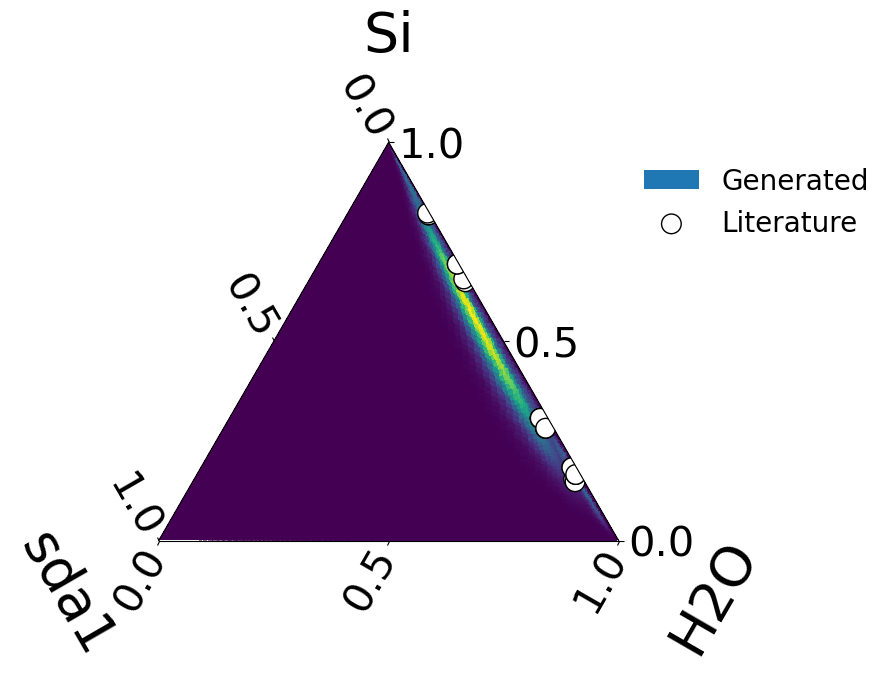

In [22]:
utils.plot_ternary(true, pred, ['Si', 'sda1', 'H2O'], 
                                        #     ternary_lim=(
                                        #             0.5, 1.0, # right
                                        #             0.0, 0.5, # left
                                        #             0.0, 0.5, # bottom
                                        #     )   
                                        grid_border_frac=5
                                    )